# Data 2 - Weather
#### - 從 2016-07-03 到 2017-07-03 的天氣資料
#### - 29 個地點
#### - 每小時一筆資料

### Step 1: Transaction Definition

#### - Find the associate rules between "測站氣壓", "溫度", "相對溼度", "風速", "風向", "降水量", "日照時數" and "Location".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import time
from sklearn.cluster import KMeans
from pylab import rcParams
%matplotlib inline


weather = pd.read_csv("weather.csv")
weather.head(200)

,Location,Date,Time,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數
0,"BANQIAO,板橋",2016-07-03,01:00,1009.6,25.3,83.0,1.0,"南南西,SSW",0.0,NaN
1,"BANQIAO,板橋",2016-07-03,02:00,1009.0,25.1,84.0,0.2,"靜風,Calm",0.0,NaN
2,"BANQIAO,板橋",2016-07-03,03:00,1008.6,25.1,84.0,0.2,"靜風,Calm",0.0,NaN
3,"BANQIAO,板橋",2016-07-03,04:00,1009.0,25.0,85.0,0.8,"南南西,SSW",0.0,NaN
4,"BANQIAO,板橋",2016-07-03,05:00,1009.5,24.8,85.0,0.6,"西南,WS",0.0,NaN
5,"BANQIAO,板橋",2016-07-03,06:00,1009.6,25.0,83.0,0.8,"南南西,SSW",0.0,0.0
6,"BANQIAO,板橋",2016-07-03,07:00,1009.9,26.7,84.0,0.5,"西南,WS",0.0,1.0
7,"BANQIAO,板橋",2016-07-03,08:00,1009.8,28.7,74.0,0.4,"西南,WS",0.0,1.0
8,"BANQIAO,板橋",2016-07-03,09:00,1009.9,30.6,70.0,0.6,"西,W",0.0,1.0
9,"BANQIAO,板橋",2016-07-03,10:00,1009.5,32.1,62.0,0.3,"西南西,WSW",0.0,1.0


In [2]:
weather.describe()

,測站氣壓,溫度,相對溼度,風速,日照時數
count,254583.000000,254576.000000,254576.000000,254538.000000,148526.000000
mean,978.468847,22.336851,78.289953,3.144237,0.330544
std,81.001907,6.522794,11.620914,2.740838,0.420622
min,617.900000,-10.200000,0.000000,0.000000,-9.500000
25%,998.400000,18.600000,71.000000,1.300000,0.000000
50%,1006.900000,23.400000,79.000000,2.400000,0.000000
75%,1013.300000,27.100000,87.000000,4.200000,0.800000
max,1031.900000,38.300000,100.000000,42.700000,1.000000


#### - Revise the data values.

#### - Set those data with '降水量' == 'T' to 0.1 and those data with '日照時數' == 'NaN' to 0.

In [3]:
def IsNumber(s):
    try:
        if(str(s).lower() == 'nan'):
            return False
        float(s)
        return True
    except:
        return False
    
l = [x if(IsNumber(x)) else 0.1 for x in weather['降水量']]
weather['降水量'] = l

l = [x if(IsNumber(x)) else 0.0 for x in weather['日照時數']]
weather['日照時數'] = l

weather

,Location,Date,Time,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數
0,"BANQIAO,板橋",2016-07-03,01:00,1009.6,25.3,83.0,1.0,"南南西,SSW",0.0,0.0
1,"BANQIAO,板橋",2016-07-03,02:00,1009.0,25.1,84.0,0.2,"靜風,Calm",0.0,0.0
2,"BANQIAO,板橋",2016-07-03,03:00,1008.6,25.1,84.0,0.2,"靜風,Calm",0.0,0.0
3,"BANQIAO,板橋",2016-07-03,04:00,1009.0,25.0,85.0,0.8,"南南西,SSW",0.0,0.0
4,"BANQIAO,板橋",2016-07-03,05:00,1009.5,24.8,85.0,0.6,"西南,WS",0.0,0.0
5,"BANQIAO,板橋",2016-07-03,06:00,1009.6,25.0,83.0,0.8,"南南西,SSW",0.0,0.0
6,"BANQIAO,板橋",2016-07-03,07:00,1009.9,26.7,84.0,0.5,"西南,WS",0.0,1.0
7,"BANQIAO,板橋",2016-07-03,08:00,1009.8,28.7,74.0,0.4,"西南,WS",0.0,1.0
8,"BANQIAO,板橋",2016-07-03,09:00,1009.9,30.6,70.0,0.6,"西,W",0.0,1.0
9,"BANQIAO,板橋",2016-07-03,10:00,1009.5,32.1,62.0,0.3,"西南西,WSW",0.0,1.0


#### - Merge Date and Time into the new columns : DataTime
      - DataTime = "Date-Time"

##### - Manually divide the time into four groups : 
     (a). 01:00 - 06:00
     (b). 06:00 - 12:00
     (c). 12:00 - 18:00
     (d). 18:00 - 24:00

##### - Manually divide the date into 12 groups indexed by the months.
     e,g. Date : 2016-07-03, Date_Cluster = 07
     e,g. Date : 2016-09-23, Date_Cluster = 09

##### - q1 will be the transaction database for the processing afterwards.

In [4]:
import re

l = list(weather['Date'])
l = [str(l[i])+"-"+str(x) for i, x in enumerate(weather['Time'])]
weather['DataTime'] = l

#Divide the time into four groups : [01:00, 06:00], [06:00, 12:00], [12:00, 18:00], [18:00, 24:00]
q1 = weather.drop(['Date', 'Time'], axis=1)
l_weather = list(weather['Time'])

time_set = set().union(l_weather)
#Hope to compare index instead of comparing string
time_set = sorted(time_set)
time_decoder = {i: k for i, k in enumerate(time_set)}
time_encoder = {k: i for i, k in enumerate(time_set)}

l = [time_encoder[x] for x in l_weather]
l = ["01:00-06:00" if(x>=0 and x <=5) else x for x in l]
l = ["06:00-12:00" if(IsNumber(x) and (x>5 and x <=11)) else x for x in l]
l = ["12:00-18:00" if(IsNumber(x) and (x>11 and x <=17)) else x for x in l]
l = ["18:00-24:00" if(IsNumber(x) and (x>17)) else x for x in l]
q1['Time_Cluster'] = l

#Divide the date into 12 groups indexed by the month.
l_date = list(weather['Date'])
pattern = re.compile(r'(\w*)\-(\w*)\-(\w*)')
l_month = [pattern.search(x).group(2) for x in l_date]
q1['Month'] = l_month
q1

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster,Month
0,"BANQIAO,板橋",1009.6,25.3,83.0,1.0,"南南西,SSW",0.0,0.0,2016-07-03-01:00,01:00-06:00,07
1,"BANQIAO,板橋",1009.0,25.1,84.0,0.2,"靜風,Calm",0.0,0.0,2016-07-03-02:00,01:00-06:00,07
2,"BANQIAO,板橋",1008.6,25.1,84.0,0.2,"靜風,Calm",0.0,0.0,2016-07-03-03:00,01:00-06:00,07
3,"BANQIAO,板橋",1009.0,25.0,85.0,0.8,"南南西,SSW",0.0,0.0,2016-07-03-04:00,01:00-06:00,07
4,"BANQIAO,板橋",1009.5,24.8,85.0,0.6,"西南,WS",0.0,0.0,2016-07-03-05:00,01:00-06:00,07
5,"BANQIAO,板橋",1009.6,25.0,83.0,0.8,"南南西,SSW",0.0,0.0,2016-07-03-06:00,01:00-06:00,07
6,"BANQIAO,板橋",1009.9,26.7,84.0,0.5,"西南,WS",0.0,1.0,2016-07-03-07:00,06:00-12:00,07
7,"BANQIAO,板橋",1009.8,28.7,74.0,0.4,"西南,WS",0.0,1.0,2016-07-03-08:00,06:00-12:00,07
8,"BANQIAO,板橋",1009.9,30.6,70.0,0.6,"西,W",0.0,1.0,2016-07-03-09:00,06:00-12:00,07
9,"BANQIAO,板橋",1009.5,32.1,62.0,0.3,"西南西,WSW",0.0,1.0,2016-07-03-10:00,06:00-12:00,07


In [5]:
q1.groupby('Time_Cluster').count()

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Month
Time_Cluster,,,,,,,,,,
01:00-06:00,63654,63648,63648,63648,63640,63654,63654,63654,63654,63654
06:00-12:00,63654,63640,63638,63638,63623,63654,63654,63654,63654,63654
12:00-18:00,63654,63647,63642,63642,63633,63654,63654,63654,63654,63654
18:00-24:00,63654,63648,63648,63648,63642,63654,63654,63654,63654,63654


In [6]:
q1.groupby('Month').count()

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster
Month,,,,,,,,,,
01,21576,21574,21574,21574,21574,21576,21576,21576,21576,21576
02,19488,19488,19488,19488,19488,19488,19488,19488,19488,19488
03,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576
04,20880,20877,20877,20877,20876,20880,20880,20880,20880,20880
05,21576,21556,21576,21576,21576,21576,21576,21576,21576,21576
06,20760,20758,20731,20731,20760,20760,20760,20760,20760,20760
07,22272,22270,22270,22270,22213,22272,22272,22272,22272,22272
08,21576,21573,21573,21573,21564,21576,21576,21576,21576,21576
09,20880,20879,20879,20879,20879,20880,20880,20880,20880,20880


In [7]:
print(f"len(q1) = {len(q1)}")

len(q1) = 254616


#### - Delete those NaN data in "測站氣壓", "溫度", "相對溼度", "風速", "降水量" and "日照時數"

In [8]:
def DeleteNaNData(attr, in_data_frame):
    l = [x for x in in_data_frame[attr] if(not(IsNumber(x)))]
    in_data_frame = in_data_frame[~in_data_frame[attr].isin(l)]
    return in_data_frame
def TransformToNum(attr, in_data_frame):
    l = [float(x) for x in in_data_frame[attr]]
    in_data_frame[attr] = l
    return in_data_frame

q1 = DeleteNaNData('測站氣壓', q1)
q1 = DeleteNaNData('溫度', q1)
q1 = DeleteNaNData('相對溼度', q1)
q1 = DeleteNaNData('風速', q1)
q1 = DeleteNaNData('降水量', q1)
q1 = DeleteNaNData('日照時數', q1)

q1 = TransformToNum('測站氣壓', q1)
q1 = TransformToNum('溫度', q1)
q1 = TransformToNum('相對溼度', q1)
q1 = TransformToNum('風速', q1)
q1 = TransformToNum('降水量', q1)
q1 = TransformToNum('日照時數', q1)
print(f"len(q1) = {len(q1)}")

len(q1) = 254489


### Step 2: Observation & Discretization

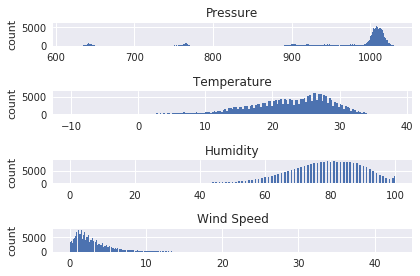

In [9]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(nrows=4)
features = ['測站氣壓', '溫度', '相對溼度', '風速']
features_eng = ['Pressure', "Temperature", "Humidity", "Wind Speed"]
for i, f in enumerate(features):
    ax[i].hist(q1[f], bins = 'auto')
    ax[i].set_title(features_eng[i])
    ax[i].set_ylabel('count')

fig.tight_layout()
plt.show()

Text(0,0.5,'Count')

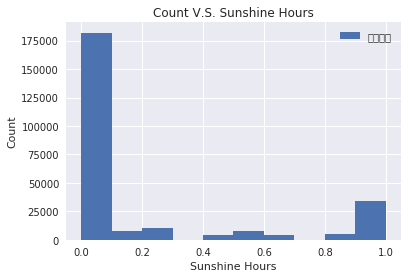

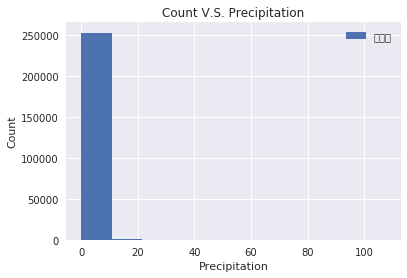

In [10]:
plt.figure(1)
ax = q1[['日照時數']].plot(kind='hist', title = 'Count V.S. Sunshine Hours')
ax.set_xlabel("Sunshine Hours")
ax.set_ylabel("Count")
plt.figure(2)
ax = q1[['降水量']].plot(kind='hist', title = 'Count V.S. Precipitation')
ax.set_xlabel("Precipitation")
ax.set_ylabel("Count")

#### - Pressure data is most concentrated around 1000. Using equal-frequency may lead to the ambiguity for those data with pressure under 1000. Besides, there are some property of aggregation around the pressure vaule 650, 750, and the range of 900 to 960 and 960 to 1031. We should use the K-means clustering for discretization

#### - Sunshine Hours data is most concentrated around [0.0, 0.1]. Using equal-frequency may lead to the ambiguity for those data with sunshine hours larger htan 0.1. Besides, there are some property of aggregation around the sunshine hours vaule [0.4, 0.6], and [0.8, 1]. We should use the K-means clustering for discretization

In [11]:
def KmeansClusterFloat(attr, in_data_frame, cluster_num):
    X = in_data_frame[[attr]]
    kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(X)
    new_attr = attr+"_Cluster"
    in_data_frame[new_attr] = kmeans.labels_
    
    max_list = list(in_data_frame.groupby(new_attr)[attr].max())
    min_list = list(in_data_frame.groupby(new_attr)[attr].min())
    in_data_frame[[new_attr]] = ["[%f, %f]" % (min_list[i], max_list[i]) for i in in_data_frame[new_attr]]
    return in_data_frame

q1 = KmeansClusterFloat('測站氣壓', q1, 5)
q1 = KmeansClusterFloat('日照時數', q1, 5)
q1.groupby('測站氣壓_Cluster').count()

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster,Month,日照時數_Cluster
測站氣壓_Cluster,,,,,,,,,,,,
"[617.900000, 650.400000]",8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664
"[731.400000, 771.700000]",8782,8782,8782,8782,8782,8782,8782,8782,8782,8782,8782,8782
"[858.200000, 936.900000]",18146,18146,18146,18146,18146,18146,18146,18146,18146,18146,18146,18146
"[937.000000, 985.400000]",17230,17230,17230,17230,17230,17230,17230,17230,17230,17230,17230,17230
"[985.500000, 1031.900000]",201667,201667,201667,201667,201667,201667,201667,201667,201667,201667,201667,201667


In [12]:
q1.groupby('日照時數_Cluster').count()

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster,Month,測站氣壓_Cluster
日照時數_Cluster,,,,,,,,,,,,
"[0.000000, 0.000000]",181927,181927,181927,181927,181927,181927,181927,181927,181927,181927,181927,181927
"[0.100000, 0.200000]",13053,13053,13053,13053,13053,13053,13053,13053,13053,13053,13053,13053
"[0.300000, 0.500000]",12912,12912,12912,12912,12912,12912,12912,12912,12912,12912,12912,12912
"[0.600000, 0.800000]",12813,12813,12813,12813,12813,12813,12813,12813,12813,12813,12813,12813
"[0.900000, 1.000000]",33784,33784,33784,33784,33784,33784,33784,33784,33784,33784,33784,33784


#### - Precipitation data is most concentrated around [0.0, 2.5]. Using equal-frequency may lead to the ambiguity for those data with precipitation larger than 2.5. 

#### - Using the standard defined by Central Weather Bureau, if the precipitation is in the range of [0, 2.5], then it is drizzling.  If in the range of [2.5, 8], then it is showers. If in the range of [8, 40], then it is pouring or heavy rain. If the precipitation is larger than 40, then it is the extremely heave rain. I manually generate the four clusters with the range equals to the definition above.

In [13]:
l = []
l = ["[{x}, {y}]".format(x = float(0), y = float(2.5)) if(x>=0 and x <=2.5) else x for x in q1['降水量']]
l = ["({x}, {y}]".format(x = float(2.5), y = float(8)) if(IsNumber(x) and (x>2.5 and x <=8)) else x for x in l]
l = ["({x}, {y}]".format(x = float(8), y = float(40)) if(IsNumber(x) and (x>8 and x <=40)) else x for x in l]
l = ["({x}, {y}]".format(x = float(40), y = float(max(q1['降水量']))) if(IsNumber(x) and (x>40)) else x for x in l]
q1['降水量_Cluster'] = l
q1.groupby('降水量_Cluster').count()

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster,Month,測站氣壓_Cluster,日照時數_Cluster
降水量_Cluster,,,,,,,,,,,,,
"(2.5, 8.0]",5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138
"(40.0, 107.5]",101,101,101,101,101,101,101,101,101,101,101,101,101
"(8.0, 40.0]",1972,1972,1972,1972,1972,1972,1972,1972,1972,1972,1972,1972,1972
"[0.0, 2.5]",247278,247278,247278,247278,247278,247278,247278,247278,247278,247278,247278,247278,247278


In [14]:
q1.head(300)
#q1.groupby('Location').count()

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster,Month,測站氣壓_Cluster,日照時數_Cluster,降水量_Cluster
0,"BANQIAO,板橋",1009.6,25.3,83.0,1.0,"南南西,SSW",0.0,0.0,2016-07-03-01:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]"
1,"BANQIAO,板橋",1009.0,25.1,84.0,0.2,"靜風,Calm",0.0,0.0,2016-07-03-02:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]"
2,"BANQIAO,板橋",1008.6,25.1,84.0,0.2,"靜風,Calm",0.0,0.0,2016-07-03-03:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]"
3,"BANQIAO,板橋",1009.0,25.0,85.0,0.8,"南南西,SSW",0.0,0.0,2016-07-03-04:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]"
4,"BANQIAO,板橋",1009.5,24.8,85.0,0.6,"西南,WS",0.0,0.0,2016-07-03-05:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]"
5,"BANQIAO,板橋",1009.6,25.0,83.0,0.8,"南南西,SSW",0.0,0.0,2016-07-03-06:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]"
6,"BANQIAO,板橋",1009.9,26.7,84.0,0.5,"西南,WS",0.0,1.0,2016-07-03-07:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]"
7,"BANQIAO,板橋",1009.8,28.7,74.0,0.4,"西南,WS",0.0,1.0,2016-07-03-08:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]"
8,"BANQIAO,板橋",1009.9,30.6,70.0,0.6,"西,W",0.0,1.0,2016-07-03-09:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]"
9,"BANQIAO,板橋",1009.5,32.1,62.0,0.3,"西南西,WSW",0.0,1.0,2016-07-03-10:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]"


#### - Using the standard defined by Taiwan Typhoon Information Center, there are 13 classes according to the speed of the wind(m/s).
    (a). Calm              0.0  - 0.2
    (b). Light air         0.3  - 1.5
    (c). Light breeze      1.6  - 3.3
    (d). Gentle breeze     3.4  - 5.4
    (e). Moderate breeze   5.5  - 7.9 
    (f). Fresh breeze      8.0  - 10.7
    (g). Strong breeze     10.8 - 13.8
    (h). Near gale         13.9 - 17.1
    (i). Gale              17.2 - 20.7
    (j). Strong gale       20.8 - 24.4
    (k). Storm             24.5 - 28.4
    (l). Violent storm     28.5 - 32.6
    (m). Hurricane         32.7 - 36.9

#### - I manually generate the 13 classes based on the range defined by Taiwan Typhoon Information Center.

In [15]:
l = []
l = ["[{x}, {y}]".format(x = float(0), y = float(0.2)) if(x>=0 and x <=0.2) else x for x in q1['風速']]
l = ["({x}, {y}]".format(x = float(0.2), y = float(1.5)) if(IsNumber(x) and (x>0.2 and x <=1.5)) else x for x in l]
l = ["({x}, {y}]".format(x = float(1.5), y = float(3.3)) if(IsNumber(x) and (x>1.5 and x <=3.3)) else x for x in l]
l = ["({x}, {y}]".format(x = float(3.3), y = float(5.4)) if(IsNumber(x) and (x>3.3 and x<=5.4)) else x for x in l]
l = ["({x}, {y}]".format(x = float(5.4), y = float(7.9)) if(IsNumber(x) and (x>5.4 and x<=7.9)) else x for x in l]
l = ["({x}, {y}]".format(x = float(7.9), y = float(10.7)) if(IsNumber(x) and (x>7.9 and x<=10.7)) else x for x in l]
l = ["({x}, {y}]".format(x = float(10.7), y = float(13.8)) if(IsNumber(x) and (x>10.7 and x<=13.8)) else x for x in l]
l = ["({x}, {y}]".format(x = float(13.8), y = float(17.1)) if(IsNumber(x) and (x>13.8 and x<=17.1)) else x for x in l]
l = ["({x}, {y}]".format(x = float(17.1), y = float(20.7)) if(IsNumber(x) and (x>17.1 and x<=20.7)) else x for x in l]
l = ["({x}, {y}]".format(x = float(20.7), y = float(24.4)) if(IsNumber(x) and (x>20.7 and x<=24.4)) else x for x in l]
l = ["({x}, {y}]".format(x = float(24.4), y = float(28.4)) if(IsNumber(x) and (x>24.4 and x<=28.4)) else x for x in l]
l = ["({x}, {y}]".format(x = float(28.4), y = float(32.6)) if(IsNumber(x) and (x>28.4 and x<=32.6)) else x for x in l]
l = ["({x}, {y}]".format(x = float(32.6), y = float(36.9)) if(IsNumber(x) and (x>32.6 and x<=36.9)) else x for x in l]
l = ["({x}, {y}]".format(x = float(36.9), y = float(max(q1['風速']))) if(IsNumber(x) and (x>36.9)) else x for x in l]
q1['風速_Cluster'] = l
q1.groupby('風速_Cluster').count()

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster,Month,測站氣壓_Cluster,日照時數_Cluster,降水量_Cluster
風速_Cluster,,,,,,,,,,,,,,
"(0.2, 1.5]",69646,69646,69646,69646,69646,69646,69646,69646,69646,69646,69646,69646,69646,69646
"(1.5, 3.3]",86390,86390,86390,86390,86390,86390,86390,86390,86390,86390,86390,86390,86390,86390
"(10.7, 13.8]",4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024
"(13.8, 17.1]",1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481
"(17.1, 20.7]",363,363,363,363,363,363,363,363,363,363,363,363,363,363
"(20.7, 24.4]",84,84,84,84,84,84,84,84,84,84,84,84,84,84
"(24.4, 28.4]",39,39,39,39,39,39,39,39,39,39,39,39,39,39
"(28.4, 32.6]",8,8,8,8,8,8,8,8,8,8,8,8,8,8
"(3.3, 5.4]",49608,49608,49608,49608,49608,49608,49608,49608,49608,49608,49608,49608,49608,49608


#### - Temperature data are all similar to normal distributation. Compared with Pressure, Sunshin Hours and Precipitation, the data here spreads wider on the range of values. Hence I use equal-fequency method to do the discretization for Temperature data.

#### - Humiity data is well defined in the range of 0% to 100%. Compared with Pressure, Sunshin Hours and Precipitation, the data here spreads wider on the range of values. However, the meaning of the range is well-known and easy to understand. It is appropriate to use the existing definition.

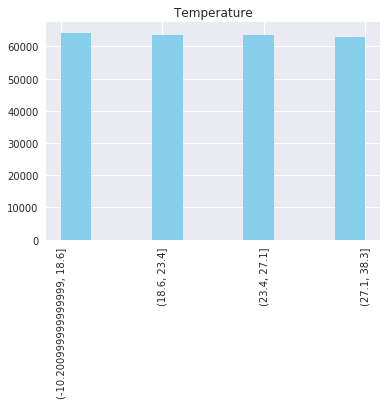

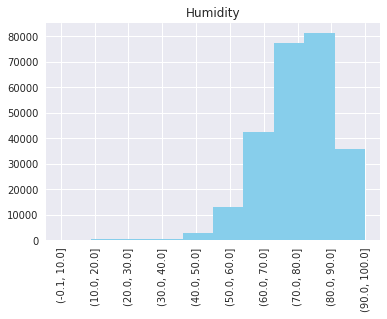

In [16]:
result = []
features_eng = ["Temperature", "Humidity"]
result.append(pd.qcut(q1['溫度'], 4))
result.append(pd.cut(q1['相對溼度'], 10))

for i in range(len(result)):
    fig, ax = plt.subplots(1,1)
    result[i] = [str(x) for x in result[i]]
    plt.figure(i)
    ax.hist(result[i], color = 'skyblue')
    ax.set_title(features_eng[i])
    for tick in ax.get_xticklabels():
        tick.set_y(0)
        tick.set_rotation(90)

In [17]:
q1

,Location,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數,DataTime,Time_Cluster,Month,測站氣壓_Cluster,日照時數_Cluster,降水量_Cluster,風速_Cluster
0,"BANQIAO,板橋",1009.6,25.3,83.0,1.0,"南南西,SSW",0.0,0.0,2016-07-03-01:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]","(0.2, 1.5]"
1,"BANQIAO,板橋",1009.0,25.1,84.0,0.2,"靜風,Calm",0.0,0.0,2016-07-03-02:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]","[0.0, 0.2]"
2,"BANQIAO,板橋",1008.6,25.1,84.0,0.2,"靜風,Calm",0.0,0.0,2016-07-03-03:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]","[0.0, 0.2]"
3,"BANQIAO,板橋",1009.0,25.0,85.0,0.8,"南南西,SSW",0.0,0.0,2016-07-03-04:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]","(0.2, 1.5]"
4,"BANQIAO,板橋",1009.5,24.8,85.0,0.6,"西南,WS",0.0,0.0,2016-07-03-05:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]","(0.2, 1.5]"
5,"BANQIAO,板橋",1009.6,25.0,83.0,0.8,"南南西,SSW",0.0,0.0,2016-07-03-06:00,01:00-06:00,07,"[985.500000, 1031.900000]","[0.000000, 0.000000]","[0.0, 2.5]","(0.2, 1.5]"
6,"BANQIAO,板橋",1009.9,26.7,84.0,0.5,"西南,WS",0.0,1.0,2016-07-03-07:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]","(0.2, 1.5]"
7,"BANQIAO,板橋",1009.8,28.7,74.0,0.4,"西南,WS",0.0,1.0,2016-07-03-08:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]","(0.2, 1.5]"
8,"BANQIAO,板橋",1009.9,30.6,70.0,0.6,"西,W",0.0,1.0,2016-07-03-09:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]","(0.2, 1.5]"
9,"BANQIAO,板橋",1009.5,32.1,62.0,0.3,"西南西,WSW",0.0,1.0,2016-07-03-10:00,06:00-12:00,07,"[985.500000, 1031.900000]","[0.900000, 1.000000]","[0.0, 2.5]","(0.2, 1.5]"


### Step3: find rules by FP-growth algorithm

用 orange3-associate 提供的 FP-growth algorithm 找 discretization 後的資料中的 rules

- 挑出support > 10000/資料筆數
- 挑出confidence > 0.7 的 rules

In [18]:
# 合併切過的資料
press_items = ['測站氣壓 ' + x for x in q1['測站氣壓_Cluster']]
sun_items = ['日照時數 ' + str(x) for x in q1['日照時數_Cluster']]
rain_items = ['降水量 ' + str(x) for x in q1['降水量_Cluster']]
loc_items = ['' + x for x in q1['Location']]
wind_dir_items = ['' + x for x in q1['風向']]
month_items = ['Month ' + str(x) for x in q1['Month']]
time_items = ['Time_Cluster ' + str(x) for x in q1['Time_Cluster']]
wind_speed_items = ['風速 ' + x for x in q1['風速_Cluster']]
temp_items = ['溫度 ' + x for x in result[0]]
hum_items = ['相對溼度 ' + x for x in result[1]]

data_cut = []
data_cut.append(press_items)
data_cut.append(sun_items)
data_cut.append(rain_items)
data_cut.append(loc_items)
data_cut.append(wind_dir_items)
data_cut.append(month_items)
data_cut.append(time_items)
data_cut.append(temp_items)
data_cut.append(hum_items)
data_cut.append(wind_speed_items)
transactions = list(zip(*data_cut))
transactions

[('測站氣壓 [985.500000, 1031.900000]',
  '日照時數 [0.000000, 0.000000]',
  '降水量 [0.0, 2.5]',
  'BANQIAO,板橋',
  '南南西,SSW',
  'Month 07',
  'Time_Cluster 01:00-06:00',
  '溫度 (23.4, 27.1]',
  '相對溼度 (80.0, 90.0]',
  '風速 (0.2, 1.5]'),
 ('測站氣壓 [985.500000, 1031.900000]',
  '日照時數 [0.000000, 0.000000]',
  '降水量 [0.0, 2.5]',
  'BANQIAO,板橋',
  '靜風,Calm',
  'Month 07',
  'Time_Cluster 01:00-06:00',
  '溫度 (23.4, 27.1]',
  '相對溼度 (80.0, 90.0]',
  '風速 [0.0, 0.2]'),
 ('測站氣壓 [985.500000, 1031.900000]',
  '日照時數 [0.000000, 0.000000]',
  '降水量 [0.0, 2.5]',
  'BANQIAO,板橋',
  '靜風,Calm',
  'Month 07',
  'Time_Cluster 01:00-06:00',
  '溫度 (23.4, 27.1]',
  '相對溼度 (80.0, 90.0]',
  '風速 [0.0, 0.2]'),
 ('測站氣壓 [985.500000, 1031.900000]',
  '日照時數 [0.000000, 0.000000]',
  '降水量 [0.0, 2.5]',
  'BANQIAO,板橋',
  '南南西,SSW',
  'Month 07',
  'Time_Cluster 01:00-06:00',
  '溫度 (23.4, 27.1]',
  '相對溼度 (80.0, 90.0]',
  '風速 (0.2, 1.5]'),
 ('測站氣壓 [985.500000, 1031.900000]',
  '日照時數 [0.000000, 0.000000]',
  '降水量 [0.0, 2.5]',
  'BANQIAO,板橋',
 

#### Fp-growth

Orange3 的 fpgrowth 只能處理整數，所以需要寫一個 encoder 和 decoder 來互相轉換

In [19]:
from orangecontrib.associate import fpgrowth as fpg

start = time.time()

# 建立一個 Set ，包含所有種類的 items
itemset = set().union(*transactions)
# 利用 itemset 建構 decoder 及 encoder
decoder = {i: k for i, k in enumerate(itemset)}
encoder = {k: i for i, k in enumerate(itemset)}

# 找出 frequent item set ，min_support 0.2，代表當一個 Pattern 出現 資料筆數*0.2 次時，即符合條件
itemsets =  dict(fpg.frequent_itemsets([[encoder[i] for i in t] for t in transactions], 0.3))
# 設定 min_confidence = 0.5 ，找出所有 rules
rules = list(fpg.association_rules(itemsets, 0.7))

print("Fpgrowth took", time.time() - start, "seconds.")
print(len(rules), "Results")

Fpgrowth took 1.6783454418182373 seconds.
13 Results


In [20]:
for rule in rules:
    a = [decoder[i] for i in rule[0]]
    b = [decoder[i] for i in rule[1]]
    s, c = rule[2], rule[3]
    print(a, ' -> ', b, c)

['日照時數 [0.000000, 0.000000]', '降水量 [0.0, 2.5]']  ->  ['測站氣壓 [985.500000, 1031.900000]'] 0.793382664089573
['日照時數 [0.000000, 0.000000]']  ->  ['測站氣壓 [985.500000, 1031.900000]', '降水量 [0.0, 2.5]'] 0.7626245691953366
['測站氣壓 [985.500000, 1031.900000]', '降水量 [0.0, 2.5]']  ->  ['日照時數 [0.000000, 0.000000]'] 0.7047033726127591
['測站氣壓 [985.500000, 1031.900000]', '日照時數 [0.000000, 0.000000]']  ->  ['降水量 [0.0, 2.5]'] 0.9673960032910792
['降水量 [0.0, 2.5]']  ->  ['日照時數 [0.000000, 0.000000]'] 0.7071959494981357
['日照時數 [0.000000, 0.000000]']  ->  ['降水量 [0.0, 2.5]'] 0.9612317028258587
['相對溼度 (80.0, 90.0]']  ->  ['降水量 [0.0, 2.5]'] 0.9702356040276717
['相對溼度 (70.0, 80.0]']  ->  ['降水量 [0.0, 2.5]'] 0.9980922672372678
['風速 (1.5, 3.3]']  ->  ['降水量 [0.0, 2.5]'] 0.9717096886213682
['日照時數 [0.000000, 0.000000]']  ->  ['測站氣壓 [985.500000, 1031.900000]'] 0.7883271861790718
['測站氣壓 [985.500000, 1031.900000]']  ->  ['日照時數 [0.000000, 0.000000]'] 0.7111624608884944
['降水量 [0.0, 2.5]']  ->  ['測站氣壓 [985.500000, 1031.900000]']

### Step 4: Explantion

- 日照時數0(晚上)時, 通常降水量低(0.0 - 2.5 mm/hrs)且測站氣壓接近一大氣壓(985.5 - 1031.9)
- 輕風(風速介於1.5 - 3.3 m/s)時, 降水量低(0.0 - 2.5 mm/hr)
- 相對濕度介於70 - 90%時, 降水量低(0.0 - 2.5 mm/hr)